# <center>Bank Churn Model</center>

### Sources and credits for this project

- https://www.kaggle.com/shrutimechlearn/churn-modelling
- Big thanks to https://www.superdatascience.com/pages/deep-learning
- author
- Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.


## Introduction and Goal definition

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. The column representing it is 'Exited', with 1 for a customer that did exited, and 0 for a customer who stayed.

### Workflow stages

1. Prepare and clean the data for work. 
2. Analyze, identify patterns, and explore the data.
3. Division of the records into a training group and a test group.
4. Models training and evaluation.

## 1) Prepare and clean the data for work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Attributes explanation:

- RowNumber: Row Numbers from 1 to 10000.
- CustomerId: Unique Ids for bank customer identification.
- Surname: Customer's last name.
- CreditScore: Credit score of the customer.
- Geography: The country from which the customer belongs.
- Gender: Male or Female.
- Age: Age of the customer. 
- Tenure: Number of years for which the customer has been with the bank.
- Balance: Bank balance of the customer.
- NumOfProducts: Number of bank products the customer is utilising.
- HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not.
- IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not.
- EstimatedSalary: Estimated salary of the customer in Dollars.
- Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

### Basic Exploratory Of The Data - Quick Look at the Data Structure

We want to check for unneccecery and problamatic columns that might need removal or normalization.

Let's take a basic look about the columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The data is clean from null values, and is mostly conducted from numerical values.
The columns that are conducted from Object values are:

- Surname: Non-categorial so with no benefit for our reasearch.
- Geography: Categorial, we will look further to see which ones.
- Gender: Categorial, Males and Females.

In [5]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

We can see that our bank serves only three countries: mainly France, but also Germany and Spain. Also we can see most of it's customers are male.

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


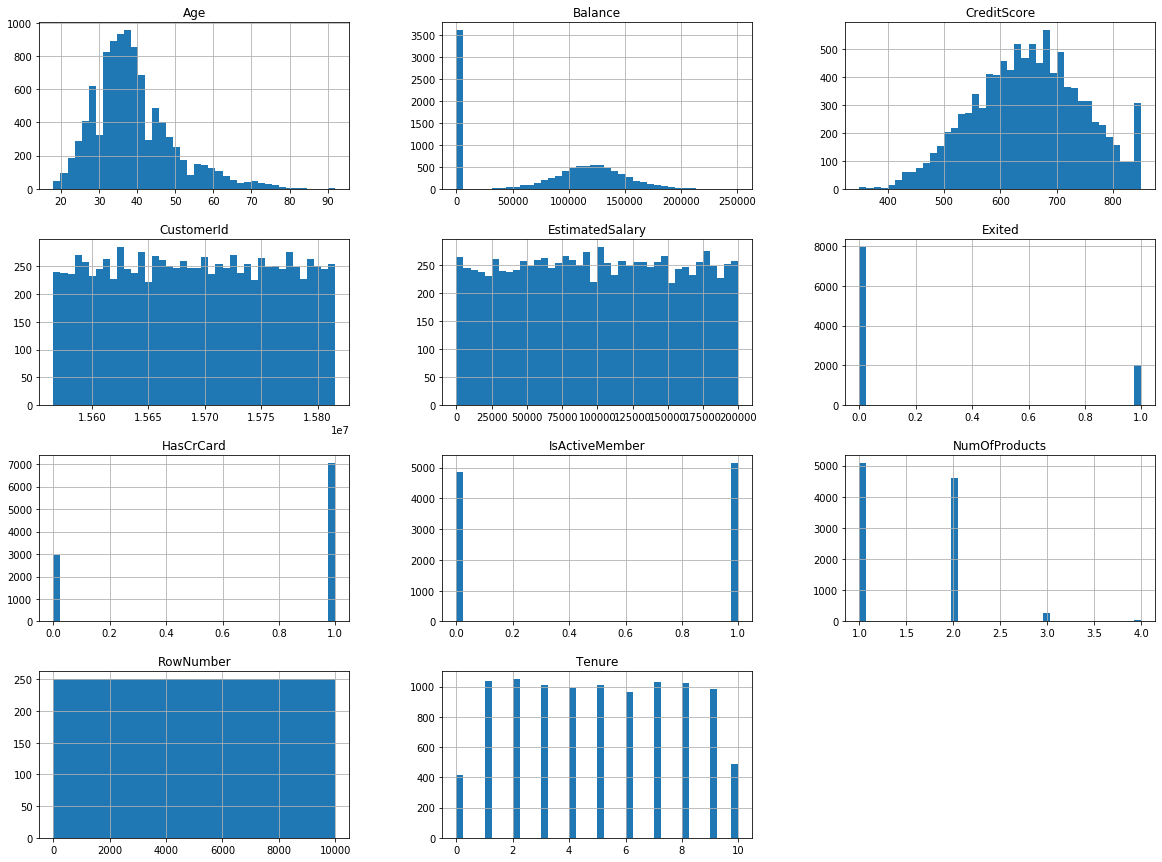

In [8]:
data.hist(bins=40, figsize=(20,15))
plt.show()

Describing the data starts reavilling more intresting insights about the numerical features but we will go deeper on that later.

For now, we can notice:

- Age, is a bit long-tail.
- Balance might have an outlier.
- Estimated Salary, IsActiveMember and Tenure are spread pretty even.
- Most customers did not exit.
- Most customers has a credit card.
- Almost all customers are using 1-2 products.

### Cleaning The Data

I will drop completely useless columns.

In [9]:
data.drop(['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Converting Object Columns to Numerical

In [11]:
gender_dummies = pd.get_dummies(data['Gender'])
geo_dummies = pd.get_dummies(data['Geography'], prefix = "Geo_dummy")
data = pd.concat([data, geo_dummies, gender_dummies], axis = 1)
data.drop(['Geography', 'Gender', 'Female'],axis = 1, inplace=True)
data.rename(columns={'Male': 'Gender'}, inplace=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_dummy_France,Geo_dummy_Germany,Geo_dummy_Spain,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


Rearange for the columns order:

In [12]:
list(data.columns.values)

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geo_dummy_France',
 'Geo_dummy_Germany',
 'Geo_dummy_Spain',
 'Gender']

In [13]:
data = data[[
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geo_dummy_France',
 'Geo_dummy_Germany',
 'Geo_dummy_Spain',
 'Exited'
]]
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_dummy_France,Geo_dummy_Germany,Geo_dummy_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0,1


## 2) Analyze, identify patterns, and explore the data

Now that we have our data basicly ready to work with, we can examn it more closly to have deeper understanding of the data, analyzing, looking for patterns, corralations and finaly deciding which features are relavent to us and which models to develop.

### Features Correlation Matrix

I want to start with a simple correlation matrix to look for noticeable correlation between features, and in particular, between features to the 'Exited' value.

In [14]:
corr = data.corr()
corr.style\
    .background_gradient(cmap='viridis', axis=None)\
    .set_precision(2)\
    .set_caption('Features Correlation Matrix')\

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_dummy_France,Geo_dummy_Germany,Geo_dummy_Spain,Exited
CreditScore,1,-0.0029,-0.004,0.00084,0.0063,0.012,-0.0055,0.026,-0.0014,-0.0089,0.0055,0.0048,-0.027
Gender,-0.0029,1,-0.028,0.015,0.012,-0.022,0.0058,0.023,-0.0081,0.0068,-0.025,0.017,-0.11
Age,-0.004,-0.028,1,-0.01,0.028,-0.031,-0.012,0.085,-0.0072,-0.039,0.047,-0.0017,0.29
Tenure,0.00084,0.015,-0.01,1,-0.012,0.013,0.023,-0.028,0.0078,-0.0028,-0.00057,0.0039,-0.014
Balance,0.0063,0.012,0.028,-0.012,1,-0.3,-0.015,-0.01,0.013,-0.23,0.4,-0.13,0.12
NumOfProducts,0.012,-0.022,-0.031,0.013,-0.3,1,0.0032,0.0096,0.014,0.0012,-0.01,0.009,-0.048
HasCrCard,-0.0055,0.0058,-0.012,0.023,-0.015,0.0032,1,-0.012,-0.0099,0.0025,0.011,-0.013,-0.0071
IsActiveMember,0.026,0.023,0.085,-0.028,-0.01,0.0096,-0.012,1,-0.011,0.0033,-0.02,0.017,-0.16
EstimatedSalary,-0.0014,-0.0081,-0.0072,0.0078,0.013,0.014,-0.0099,-0.011,1,-0.0033,0.01,-0.0065,0.012
Geo_dummy_France,-0.0089,0.0068,-0.039,-0.0028,-0.23,0.0012,0.0025,0.0033,-0.0033,1,-0.58,-0.58,-0.1


To be more specific, we can see the correlation of each attribute to 'Extied', where numbers closer to the edges are what we are looking for. A value close to 1 indicates strong positive correlation, and a value close to -1 indicates strong negative correlation.

In [15]:
corr['Exited'].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geo_dummy_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geo_dummy_Spain     -0.052667
Geo_dummy_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

Our top candidates (an absolute score of at least 0.1) are:

Positive correlation:

- Age
- Geo_dummy_Germany
- Balance

Positive correlation:

 - IsActiveMember
 - Gender
 - Geo_dummy_France

In [16]:
# ////////////////////////////////////////////////
#                      TRY
# ////////////////////////////////////////////////

In [17]:
germans = data[data['Geo_dummy_Germany'] == 1]
french = data[data['Geo_dummy_France'] == 1]
spanish = data[data['Geo_dummy_Spain'] == 1]
germans['Exited'].value_counts(normalize=True)
# french['Exited'].value_counts(normalize=True)
# spanish['Exited'].value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

In [18]:
from collections import Counter
import math
import scipy.stats as ss

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

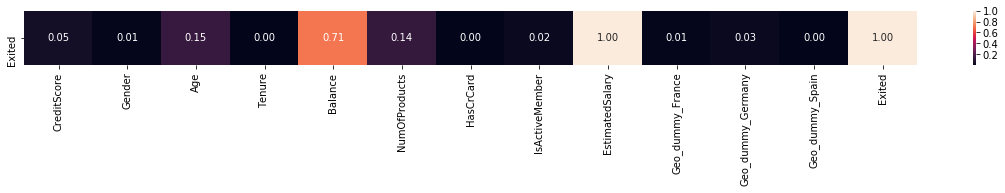

In [19]:
theilu = pd.DataFrame(index=['Exited'],columns=data.columns)
columns = data.columns
for j in range(0,len(columns)):
    u = theil_u(data['Exited'].tolist(),data[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

In [20]:
# ////////////////////////////////////////////////
#                      TRY
# ////////////////////////////////////////////////

### Balance to NumOfProducts

Text(0, 0.5, 'Balance')

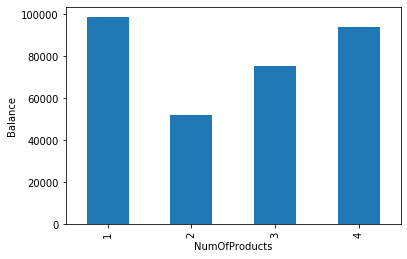

In [21]:
BalanceNumOfProducts = data.groupby('NumOfProducts')['Balance'].mean()
BalanceNumOfProducts = BalanceNumOfProducts.plot.bar()
BalanceNumOfProducts.set_ylabel("Balance")

### NumOfProducts to Exited

Text(0, 0.5, 'Exited')

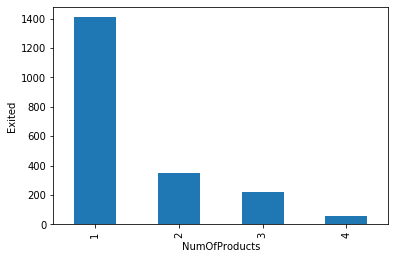

In [22]:
NumOfProductsExited = data.groupby('NumOfProducts')['Exited'].sum()
NumOfProductsExited = NumOfProductsExited.plot.bar()
NumOfProductsExited.set_ylabel("Exited")

### Age to Exited

Text(0, 0.5, 'Exited')

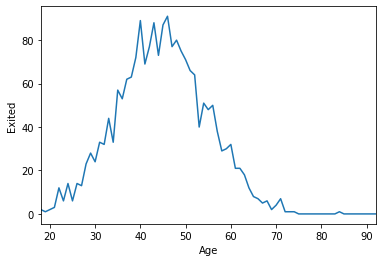

In [23]:
AgeExited = data.groupby('Age')['Exited'].sum()
AgeExited = AgeExited.plot.line()
AgeExited.set_ylabel("Exited")

### Country to Balance

Text(0, 0.5, 'Exited')

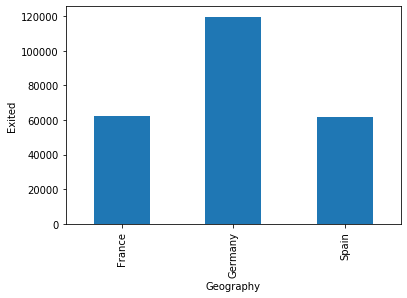

In [24]:
ogdata = pd.read_csv('data/Churn_Modelling.csv')
countryBalance = ogdata.groupby('Geography')['Balance'].mean()
countryBalance = countryBalance.plot.bar()
countryBalance.set_ylabel("Exited")

### Country to Exited

Text(0, 0.5, 'Exited')

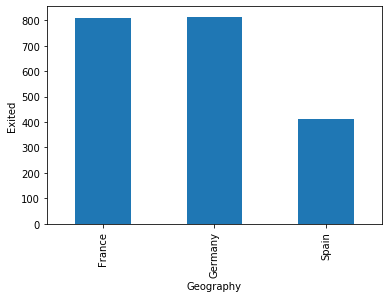

In [25]:
countryExited = ogdata.groupby('Geography')['Exited'].sum()
countryExited = countryExited.plot.bar()
countryExited.set_ylabel("Exited")

### Looking for outliers

We can use boxplot to detect pretty easily if there is any outliers in any of our attributes.

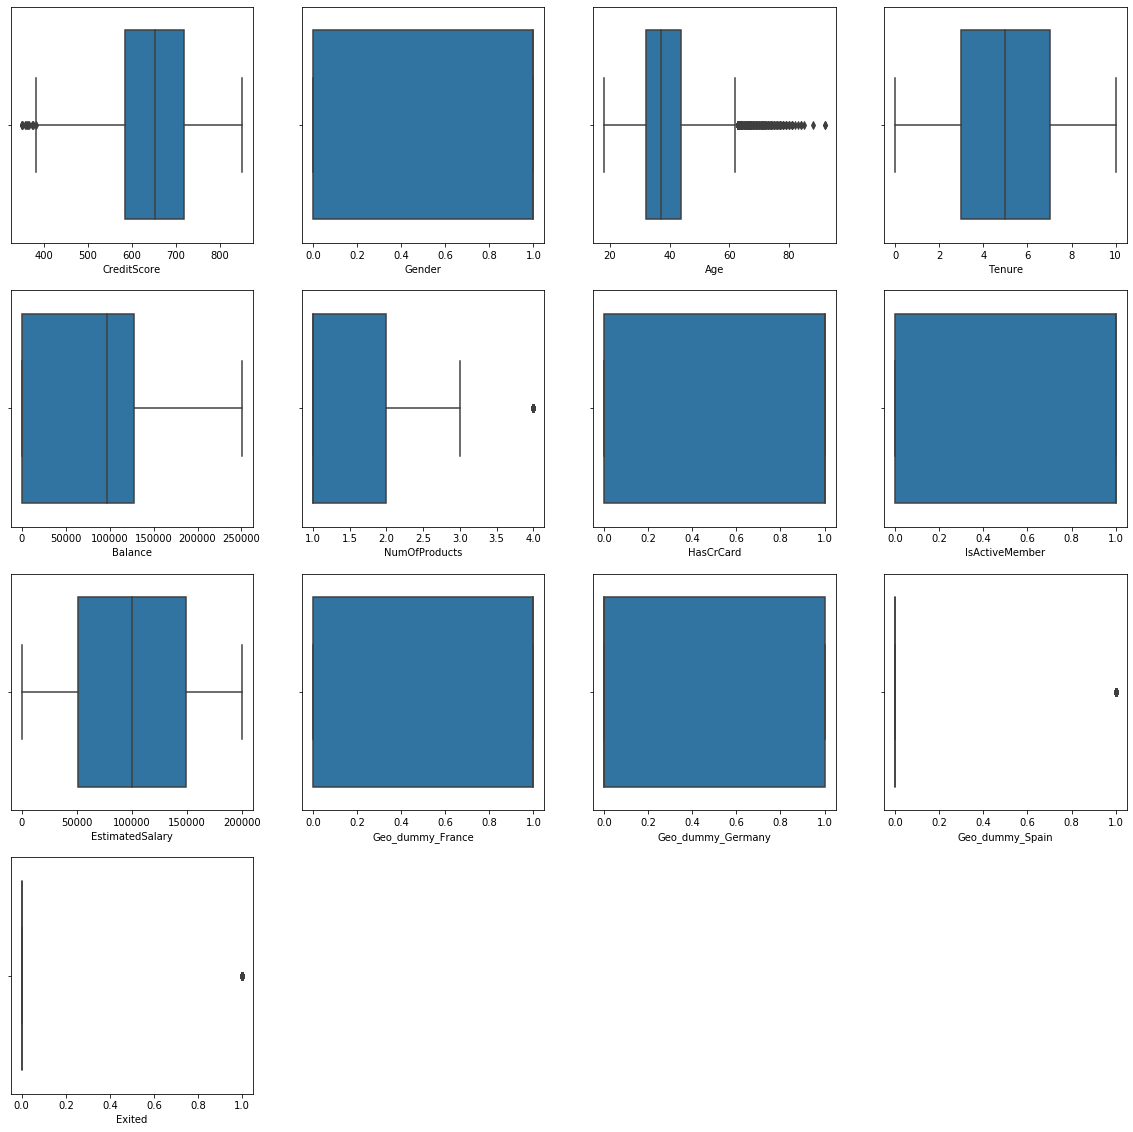

In [26]:
cols = list(data.columns)

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in cols:
    plt.subplot(a, b, c)
    sns.boxplot(x=data[i])
    c += 1

plt.show()

Even we might see tiny exceptions in some attributes, they are not real outliers. When we look closer in each of them and considering the scale of each of them, then we see the "exceptions" are not far enough, so there are no real outliers for us to remove.

## 3) Division of the records into a training group and a test group

In [27]:
X = data.drop(['Exited'], axis=1)
y = data["Exited"]

### Normalizing the Data

To get better results from our model we can normalize the data.
A good scaler for that would be MinMaxScaler which is known to be sensetive to outliers but because we made sure we do not have outliers we can confidently use it.

In [29]:
from sklearn.preprocessing import MinMaxScaler
X_cols = X.columns
scaler = MinMaxScaler()
norm_X = scaler.fit_transform(X)
norm_X = pd.DataFrame(norm_X, columns=X_cols)
norm_X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_dummy_France,Geo_dummy_Germany,Geo_dummy_Spain
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0
9996,0.332,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0
9997,0.718,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0
9998,0.844,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.20, random_state=0)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (8000, 12)
y_train shape:  (8000,)
x_test shape:  (2000, 12)
y_test shape:  (2000,)


## 4) Models training and evaluation.

### KNN

In [31]:
# Defining the model with a k number of 13:
knn = KNeighborsClassifier(n_neighbors=13)

# Training the model:
knn.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred1 = knn.predict(x_test)

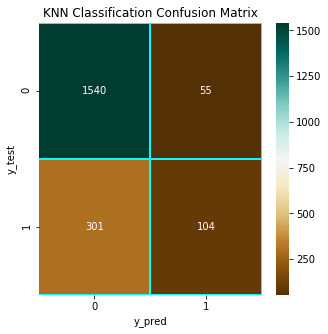

In [32]:
# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, y_pred1)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [45]:
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.822


### Random Forest

In [34]:
# Defining:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Training:
rf.fit(x_train, y_train)

# Predicting:
y_pred5 = rf.predict(x_test)

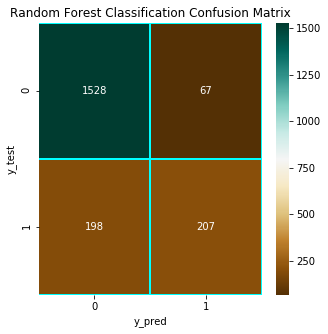

In [35]:
# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred5)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [46]:
rf_score = rf.score(x_test, y_test)
print(rf_score)

0.8675


### Comparing the Classification Algorithms

First, lets compare to a dummy model.

In [42]:
data.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

We can see by the value counts of the whole data set that if we would guess that no customer ever left, the guessing model score would be 0.7963 meaning we would be right 79.63% of the time. Not too bad.

In [43]:
dummy_score = data.Exited.value_counts(normalize=True)[0]

In [47]:
print(f'''
dummy_score: {dummy_score}
knn_score: {knn_score}
rf_score: {rf_score}
''')


dummy_score: 0.7963
knn_score: 0.822
rf_score: 0.8675

